In [889]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML

## The steps involved in solving a problem with machine learning techniques

 1. Data Preprocessing
 2. Define error
 3. Split the data into test and train data.
 4. Train the model
 5. Prediction


# Step 1 : Data Preprocessing

### Load the dataset

In [890]:
#Load the dataset
boston=load_boston()

#Description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [891]:
#Put the data into pandas dataframes

features=pd.DataFrame(boston.data,columns=boston.feature_names)
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [892]:
target=pd.DataFrame(boston.target,columns=['target'])

In [893]:
target.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [894]:
#Concatenate target and features into a single dataframe
#axis=1 - it concatenate column wise

df=pd.concat([features,target],axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Use describe() to generate the summary of the dataset

In [895]:
#use round(decimals=2) to set the precision to 2 decimal places

df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [896]:
#calculate correlation between every column of the data

corr=df.corr('pearson')
corr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


In [897]:
# Take absolute values of correlations

corrs=[abs(corr[attr]['target']) for attr in list(features)]
corrs

[0.3883046085868114,
 0.3604453424505447,
 0.483725160028373,
 0.1752601771902975,
 0.4273207723732817,
 0.6953599470715389,
 0.3769545650045959,
 0.24992873408590394,
 0.3816262306397776,
 0.46853593356776646,
 0.507786685537561,
 0.33346081965706653,
 0.7376627261740143]

In [898]:
# Make a list of pairs [(corr,features)]

z=zip(corrs,list(features))
l=list(z)
l

[(0.3883046085868114, 'CRIM'),
 (0.3604453424505447, 'ZN'),
 (0.483725160028373, 'INDUS'),
 (0.1752601771902975, 'CHAS'),
 (0.4273207723732817, 'NOX'),
 (0.6953599470715389, 'RM'),
 (0.3769545650045959, 'AGE'),
 (0.24992873408590394, 'DIS'),
 (0.3816262306397776, 'RAD'),
 (0.46853593356776646, 'TAX'),
 (0.507786685537561, 'PTRATIO'),
 (0.33346081965706653, 'B'),
 (0.7376627261740143, 'LSTAT')]

In [899]:
# Sort the list of pairs in reverse/descending order,
# with the correlation value as the key for sorting

l=sorted(l,key=lambda x : x[0],reverse=True)
# we can also use l.sort(key=lambda x: x[0],reverse=True)
l

[(0.7376627261740143, 'LSTAT'),
 (0.6953599470715389, 'RM'),
 (0.507786685537561, 'PTRATIO'),
 (0.483725160028373, 'INDUS'),
 (0.46853593356776646, 'TAX'),
 (0.4273207723732817, 'NOX'),
 (0.3883046085868114, 'CRIM'),
 (0.3816262306397776, 'RAD'),
 (0.3769545650045959, 'AGE'),
 (0.3604453424505447, 'ZN'),
 (0.33346081965706653, 'B'),
 (0.24992873408590394, 'DIS'),
 (0.1752601771902975, 'CHAS')]

In [900]:
# "Unzip" pairs to two list
# zip(*l)= takes a list that looks like [[a,b,c],[d,e,f],[g,h,i]
# and returns [[a,d,g],[b,e,h],[c,f,i]]

corrs, labels=list(zip(*l))
print(corrs)
print(labels)


(0.7376627261740143, 0.6953599470715389, 0.507786685537561, 0.483725160028373, 0.46853593356776646, 0.4273207723732817, 0.3883046085868114, 0.3816262306397776, 0.3769545650045959, 0.3604453424505447, 0.33346081965706653, 0.24992873408590394, 0.1752601771902975)
('LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE', 'ZN', 'B', 'DIS', 'CHAS')


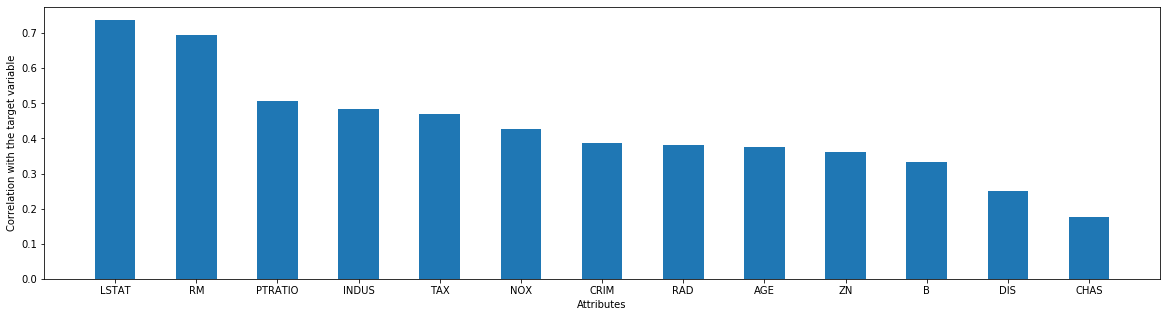

In [901]:
# Plot correlations with respect to the target variable as the bar graph

index=np.arange(len(labels))
plt.figure(figsize=(20,5))
plt.bar(index,corrs,width=0.5,tick_label=labels)
plt.xlabel("Attributes")
plt.ylabel("Correlation with the target variable")
#plt.xticks(index,labels)
plt.show()

In [902]:
X=df['LSTAT'].values
Y=df['target'].values
Y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [903]:
x_scaler=MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1,1))
X=X[:,-1]
#print(X)

y_scaler=MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:,-1]

# 2. Splitting data into fixed sets

In [904]:
#0.2 indicates 20% of data is randomly sampled as testing data
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size = 0.2)

# 3. Define error function

In [905]:
def error(m,x,c,t):
    N=x.size
    e=sum(((m * x + c) - t)**2)
    return e * 1/(2 * N)

## Define Update function

In [906]:
def update(x,m,c,t,learning_rate):
    grad_m = sum(2 * ((m * x + c) - t) * x)
    grad_c = sum(2 * ((m * x + c) - t))
    m = m - grad_m * learning_rate
    c = c - grad_c * learning_rate
    return m,c

## Define gradient_descent function

In [907]:
def gradient_descent(init_m, init_c, x, t, learning_rate, iterations, error_threshold):
    m=init_m
    c=init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e=error(m,x,c,t)
        if(e<error_threshold):
            print("Error less than the threshold. Stopping gradient descent")
            print(e)
            break
        error_values.append(e)
        m, c = update(x,m,c,t,learning_rate) 
        mc_values.append((m,c))
        
    return m, c, error_values, mc_values    
        

## Initialize all the values and pass those to the gradient_descent function

In [908]:
%%time
init_m = 0.7
init_c = 0.2
learning_rate = 0.001
iterations = 250
error_threshold = 0.001

m, c, error_values, mc_values = gradient_descent(init_m, init_c, xtrain, ytrain, learning_rate, iterations, error_threshold)


Wall time: 166 ms


In [909]:
print(m,c)

-0.7578148006352001 0.6198807370478405


# Visualization of the learning process

- **Plot the regression line** against the training data to visualize what the line looks for the training data set
- **Plot the error values** : this graph shows how the error drops over time

### __Plot the regression line upon the training data set__

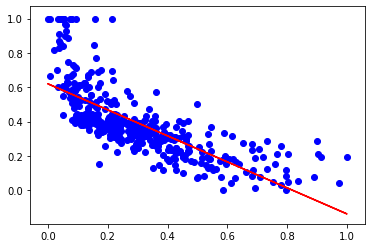

In [910]:
plt.scatter(xtrain, ytrain, color = 'b')
plt.plot(xtrain, (m*xtrain + c), color = 'r')

### **Plotting error values**

Text(0.5, 0, 'Iterations')

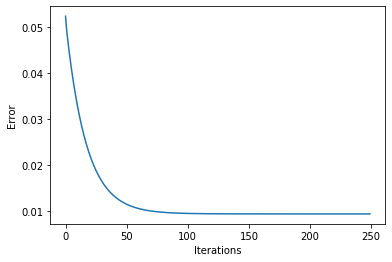

In [911]:
plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')

## Animation

In [912]:
# #Select every 5th value from mc_values to reduce the processing time.
# mc_values_anim = mc_values[0:250:5]

In [913]:
# fig, ax = plt.subplots()
# ln, = plt.plot([], [], 'ro-', animated=True)


# def init():
#     plt.scatter(xtest, ytest, color = 'g')
#     ax.set_xlim(0,1.0)
#     ax.set_ylim(0,1.0)
#     return ln,

# def update_frame(frame):
#     m, c = mc_values_anim[frame]
#     x1, y1 = -0.5, -0.5*m + c
#     x2, y2 = 1.5, 1.5*m + c
#     ln.set_data([x1,x2],[y1,y2])
#     return ln,

# anim = FuncAnimation(fig, update_frame, frames=range(len(mc_values_anim)),
#                      init_func=init, blit=True)

# HTML(anim.to_html5_video())
    
    


# 5. Prediction

In [914]:
# Calculate the predictions on the test test as a vectorized opearations
predicted = (m * xtest + c)

In [915]:
#Compute MSE for the predicted values on the testing set
mean_squared_error(ytest, predicted)

0.01930443367487945

In [916]:
# Put xtest, ytest and the predicted values into a single DataFrame so that we
#can see the predicted values alongside the testing set
p = pd.DataFrame(list(zip(xtest, ytest, predicted)),columns=['x','target_y','predicted_y'])
p=p.round(decimals=2)
p.head()

,x,target_y,predicted_y
0,0.27,0.43,0.41
1,0.08,0.62,0.56
2,0.31,0.36,0.38
3,0.20,1.00,0.47
4,0.32,0.55,0.38


## **Plot the predicted values against the target values**

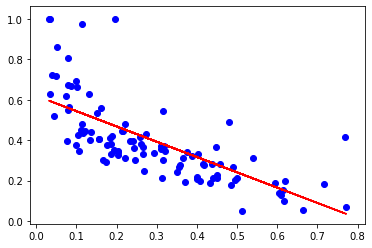

In [917]:
plt.scatter(xtest, ytest,color = 'b')
plt.plot(xtest, predicted, color = 'r')

## __Revert the normalization to obtain the predicted price of the houses<br>\$1000__
Use the inverse_transform() to scale the values to the original representation

In [918]:
# Reshape to change the shape that is required by the scaler
predicted = predicted.reshape(-1,1)
xtest = xtest.reshape(-1,1)
ytest = ytest.reshape(-1,1)

xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)
predicted_scaled = y_scaler.inverse_transform(predicted)

#This is to remove the extra dimension
xtest_scaled = xtest_scaled[:,-1]
ytest_scaled = ytest_scaled[:,-1]
predicted_scaled = predicted_scaled[:,-1]

p=pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predicted_scaled)),columns=['x','target_y','predicted_y'])
p.round(decimals=2)
p.head()

,x,target_y,predicted_y
0,11.65,24.3,23.559961
1,4.45,32.9,30.335126
2,13.00,21.1,22.289617
3,8.88,50.0,26.166517
4,13.15,29.6,22.148468
